# Lab 5 - Math 178, Spring 2024

You are encouraged to work in groups of up to 3 total students, but each student should make a submission on Canvas. (It's fine for everyone in the group to submit the same link.)

Put the full names of everyone in your group (even if you're working alone) here. This makes grading easier.

**Names**:

## Part 0 - Updating a pre-installed Python package on Deepnote

For your final project (remember that the proposal is due the same day as this lab), some code might not work due to Deepnote not having the most recent libraries installed.  Here is an example of updating Altair from version 4.2.2 to version 5.3 in Deepnote.
* On the left side, create a new file called `requirements.txt`.  (Be sure you spell this file name exactly as I did.)
* Within this requirements.txt file, include the single line `altair==5.3` (no quotation marks or anything).
* Click the Python version at the lower left (in the `Machine` section) and then click the `initialization notebook` option.  This should create an initialization notebook in the Notebooks section.  You don't need to change that notebook, but it needs to exist in order for Deepnote to know to use the `requirements.txt` file.
* If everything went correctly, the left side of Deepnote should look like this.  (The two things to notice are the `Init` notebook and the `requirements.txt` file.)
![Deepnote setup](sample_image.png)
* Check that things are working by evaluating
```
import altair as alt
alt.__version__
```
and ensuring it says some version starting with `5.3`.  You will probably need to click `Stop machine` at the lower left and then restart it.

In [ ]:
import altair as alt
alt.__version__

'5.3.0'

## Part 1 - PCA with simulated data

* Define a NumPy random number generator object `rng` by using the `default_rng` function.  Specify a `seed` value so that you get reproducible results.
* Using the `multivariate_normal` method of `rng`, define `200` data points drawn from a two-dimensional Gaussian distribution.  Keep the `mean` at the origin, but specify a covariance matrix `cov` so that the data is elongated in one direction, and so that it is *not* axis-aligned.  (PCA will not be interesting if our data is axis-aligned.  We want to have some significant correlation between the features.  There are only two features in our current case.)
* If `arr` is a 200x2 NumPy array of data, we can display it in Altair using the following code.  (**Warning**.  This code will not work if you did not update to Altair 5.3 above.  I assume NumPy, pandas, and Altair have already been imported with the standard abbreviations.  We're specifying an explicit domain for the variables so that it's easier to tell what the slope is.  Feel free to change the domain, but I think it's easiest to use the same domain for both coordinates.)
```
df = pd.DataFrame(arr, columns=["x1", "x2"])
alt.Chart(df).mark_circle().encode(
    x=alt.X("x1").scale(domain=[-10,10]),
    y=alt.Y("x2").scale(domain=[-10,10])
)
```
* If your data looks too symmetric (like a disk) or too axis-aligned, try changing your chosen covariance matrix (or, less likely, your random seed).

In [ ]:
import numpy as np
import pandas as pd

rng = rng = np.random.default_rng(seed = 18)
mean = [0,0]
cov = [[0.5,1],[0.7,1]]
arr = rng.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(arr, columns=["x1", "x2"])
alt.Chart(df).mark_circle().encode(
    x=alt.X("x1").scale(domain=[-10,10]),
    y=alt.Y("x2").scale(domain=[-10,10])
)

/tmp/ipykernel_221/91398162.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  arr = rng.multivariate_normal(mean, cov, 200)


alt.Chart(...)

* Fit a `PCA` object from `sklearn.decomposition` to the data in `arr`.

* Check the `components_` attribute of this fit `PCA` object.  Do you see how the rows of this matrix correspond to the distribution of the data?  (Sample final exam question type: Which of the following could be the principal components corresponding to the following data?)

* Using the `transform` method of our PCA object, add two new columns to our DataFrame corresponding to the principal component scores of our `arr` data.  Name these new columns `"PC1"` and `"PC2"`.

* Evaluate `df.var(axis=0)`.  This should produce four variance values.  Notice how the sum of the values for our original columns equals the sum of the values for our new columns.

* Check the `explained_variance_ratio_` attribute of our fit PCA object.  How could you compute these same numbers using the variance values just computed?

* Add a color encoding using `alt.Color` to our Altair chart, using the new column "PC1".  Specify a color scheme by using `color=alt.Color("PC1").scale(scheme=???)`.  You can see the choice of color schemes [here](https://vega.github.io/vega/docs/schemes/).  Choose a diverging color scheme (we want to be able to clearly differentiate between positive and negative scores).

* Do the same thing again, but now using "PC2" instead of "PC1" for the color scheme encoding.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(arr)
pca.components_

array([[-0.68198359, -0.73136747],
       [-0.73136747,  0.68198359]])

the first row shows that PC1 is along the direction -.68, -.73 and 2nd row shows the direction PC2 goes along.

In [ ]:
transformed_data = pca.transform(arr)
df["PC1"] = transformed_data[:,0]
df["PC2"] = transformed_data[:,1]
df.var(axis = 0)


x1     0.903801
x2     1.018600
PC1    1.783584
PC2    0.138817
dtype: float64

In [ ]:
pca.explained_variance_ratio_

array([0.92778977, 0.07221023])

In [ ]:
#manual calculation of above
variances = df.var(axis = 0)
total_variance = variances["x1"] + variances["x2"]
manual_calc = [variances["PC1"]/total_variance, variances["PC2"]/total_variance]
manual_calc

[0.9277897722163058, 0.07221022778369397]

In [ ]:
alt.Chart(df).mark_circle(size=60).encode(
    x='x1',
    y='x2',
    color=alt.Color('PC1', scale=alt.Scale(scheme='redblue'))
).properties(
    title='Data Points Colored by PC1'
).show()

alt.Chart(df).mark_circle(size=60).encode(
    x='x1',
    y='x2',
    color=alt.Color('PC2', scale=alt.Scale(scheme='redblue'))
).properties(
    title='Data Points Colored by PC2'
).show()

alt.Chart(...)

alt.Chart(...)

* Sample exam question (no need to turn anything in for this question).  Given the principal component vectors, can you recognize which points in our original dataset will have the largest scores for those principal components?

## Part 2 - PCA with the Olivetti faces dataset

* Using scikit-learn's `fetch_olivetti_faces` function (remember to import this function first), download the Olivetti faces dataset (along with the identifier values) using the following syntax.
```
X,y = fetch_olivetti_faces(return_X_y=True)
``` 

* If you import Pyplot as follows
```
import matplotlib.pyplot as plt
```
then you can display one of these faces (say the `151`st face) as follows.
```
fig, ax = plt.subplots()
ax.imshow(X[151].reshape((64, 64)), cmap="binary_r");
```

* This corresponds to the `15`-th person in the dataset, as can be seen by evaluating the following: `y[151]`

* Sample exam question (no need to turn anything in for this question).  We considered this dataset in terms of unsupervised learning.  Why would this dataset also be well-suited to use in supervised learning?

* Fit a new `PCA` object `pca_faces` to this dataset.

* Display the first (0-th in Python numbering) principal component vector as an image (reshaped to 64-by-64 dimensions), as what we did above.

* How many total principal components should be used to explain 90% of the variance?  (It's okay to use some guessing and checking to find this value, but if you want a difficult Python exercise, try to automate this without using any explicit loop.  See the *Possible extensions* section below for the approach I would use.)

* Fit another PCA object `pca2` to this face data, but this time, when instantiating the PCA object, specify that `n` components should be used, where `n` is the number needed to explain 80% of the variance (as in the previous question).  Don't worry about off-by-one errors due to Python indexing starting at 0.

* Transform the data and save it in a new variable, `X_transform`.

* Evaluate `X_transform[151]`.  How many numbers are there?  What do these numbers represent? 

* Convince yourself that the following corresponds to the 151-st face projected onto the n-dimensional subspace, spanned by the principal components we just found.  (The `dot` method is used for matrix multiplication.)
```
face_projection = np.matmul(X_transform[151], pca2.components_)
```

* Display this projected 151st face.  It should look in some ways similar to the original face displayed above.  (It should look much closer to that face than our first principal component "eigenface" did.  If it looks identical to the 151st face, then something went wrong with restricting the number of components.)

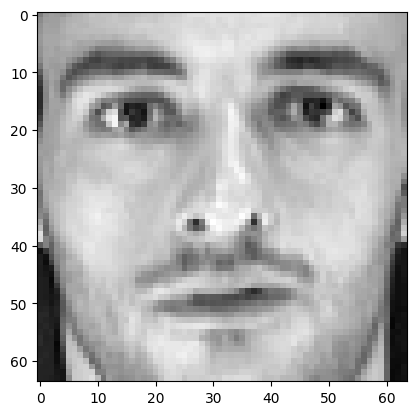

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

X, y = fetch_olivetti_faces(return_X_y=True)

fig, ax = plt.subplots()
ax.imshow(X[151].reshape((64, 64)), cmap="binary_r");

In [ ]:
y[151]

15

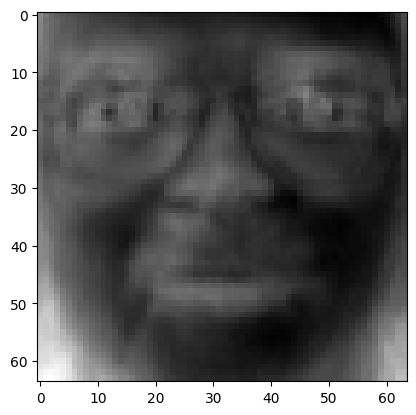

In [ ]:
pca_faces = PCA()
pca_faces.fit(X)

first_pc = pca_faces.components_[0].reshape((64,64))

fig, ax = plt.subplots()
ax.imshow(first_pc, cmap = "binary_r")

In [ ]:
explained_var = np.cumsum(pca_faces.explained_variance_ratio_)
n_components_90 = np.argmax(explained_var >= 0.90) + 1
n_components_90

66

66 principal components expain 90% of the variance

In [ ]:
pca2 = PCA(n_components=0.80)
X_transform = pca2.fit_transform(X)
X_transform[151]

array([-4.4750113 ,  0.24060403, -2.795726  ,  0.9159556 ,  1.7105948 ,
        0.10542346,  0.9735419 , -0.24324483, -0.99114597,  0.30594733,
       -0.7861552 , -0.04526834,  1.7030585 ,  1.1516234 ,  0.9111341 ,
        0.71115994,  1.1180459 , -0.582863  , -0.16154265, -0.32477325,
        0.32831222, -1.1512862 , -0.18666783,  0.6833384 , -0.05049406,
       -0.4493925 ,  0.1190879 ], dtype=float32)

27 numbers. These are the principal components that explain 80% of the variance

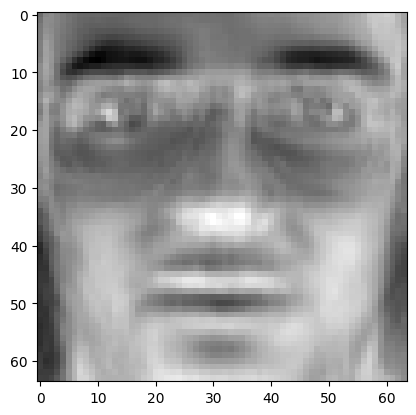

In [ ]:
face_projection = np.matmul(X_transform[151], pca2.components_)
fig, ax = plt.subplots()
ax.imshow(face_projection.reshape((64, 64)), cmap="binary_r")

## Submission

* Using the `Share` button at the top right, enable public sharing, and enable Comment privileges. Then submit the created link on Canvas.

## Possible extensions

* One interesting extension would be to perform some sort of facial recognition on this dataset using in part PCA.  There are only 400 faces in the entire dataset, even less if you hold out a test set, so I doubt a neural network is the right thing to use (but I could be wrong).
* I think it would be interesting to take only two or three people in this dataset (20 or 30 face images) and perform PCA on this portion of the dataset using only two principal components (two so we can plot it).  Then make a scatter plot of the transformed data (the scores), and color the points according to which face they corresponded.  Do the same faces appear on the same part of the scatter plot?
* A Python exercise (not a data science exercise) would be to automate finding the index where 90% of variance gets explained.  I think what I would use is `np.cumsum` and `np.nonzero`.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2663d26c-af2e-42ed-905b-597ffe30de0e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>